<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 4</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Sebastián Campos;201773517-1;Nueva</h3>
    <h3 align="center">Gabriel Carmona;201773509-0;Nueva</h3>
    <h3 align="center">Jorge Ludueña;201773507-4;Nueva</h3>
    <h3 align="center">Julio 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab4.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**

## Consideración

>En este laboratorio se evaluará el uso correcto de una semilla para replicar sus ejecuciones y observar los mismos resultados, el no cumplimiento de esto implica un descuento de 10 puntos en su nota.

In [2]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import csv
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

## 1. Test de Hipótesis (25p)

Muchos procesos estadísticos utilizados asumen la normalidad de los datos para poder trabajar, la normalidad de los datos simplifica el trabajo en muchos casos, pero, ¿es posible asumir siempre esta normalidad?, como la respuesta es claramente "no" en esta sección trabajará el [Test de hipótesis de Shapiro-Wilks](http://riotorto.users.sourceforge.net/R/noparam_shapiro/) cuya utilidad es poder determinar si un conjunto de datos sigue una distribución normal o no. (Queda propuesto para el estudiante investigar más sobre este test)

Recordando el trabajo realizado en el laboratorio anterior, respecto al teorema del límite central, utilizaremos la misma distribución dada para trabajar con este test de hipótesis 

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

Se trabajará con 3 muestras:

* Una muestra de tamaño 1000 de la población original (distribución dada)
* La distribución de 1000 medias de muestras de tamaño 12 
* La distribución de 1000 medias de muestras de tamaño 120

>a) A priori ¿Qué muestra/s esperaría usted que siguieran una distribución normal? ¿Cuáles no? Responda utilizando el teorema del límite central. (Independiente de lo que obtenga en b), el puntaje se dará según la justificación que se de)

Utilizando el teorema del límite central, se esperaría que la segunda y tercera muestra siguieran una distribución normal, debido a que se repite el proceso una gran cantidad de veces sacando las medias de muestras, en este caso 1000 veces.
Luego utilizando el mismo argumento se esperaría que la primera muestra no siguiera una distribución normal, debido a que esta muestra seguira la distribución la cual no se ve que sea una distribución normal, añadiendo que son valores discretos.

>b) Realice el test de hipótesis de shapiro-wilk **utilizando las funciones provistas por los lenguajes** y comente las muestras que cumplen con la normalidad de datos y las que no bajo un nivel de significancia del 1% y 5%. Compare los resultados que obtiene con cada nivel de significancia para cada muestra y comente.

Aquí se define la función que permite sacar el valor según la probabilidad dada

In [19]:
def nani():
    x = random.random()
    if(0 <= x < 0.1):
        return 1
    elif(0.1 <= x < 0.3):
        return 2
    elif(0.3 <= x < 0.35):
        return 5
    elif(0.35 <= x < 0.4):
        return 6
    elif(0.4 <= x < 0.6):
        return 7
    elif(0.6 <= x < 0.7):
        return 9
    elif(0.7 <= x < 0.75):
        return 10
    elif(0.75 <= x < 0.95):
        return 11
    elif(0.95 <= x <= 1):
        return 12

Aquí se sacan las muestras y se utiliza la función shapiro para ello

In [20]:
muestra_1 = []
muestra_2 = []
muestra_3 = []
i = 0
random.seed(2)
while(i < 1000):
    muestra_1.append(nani())
    j = 0
    suma = 0
    while(j < 12):
        suma = suma + nani()
        j+=1
    muestra_2.append(suma/12)
    j = 0
    suma = 0
    while(j < 120):
        suma = suma + nani()
        j+=1
    muestra_3.append(suma/120)
    i+=1
print("Para una muestra de tamaño 1000 de la población original se obtuvo")
print("W = " + str(stats.shapiro(muestra_1)[0]) + " p-valor = " + str(stats.shapiro(muestra_1)[1]))
print()
print("Para la distribución de 1000 medias de muestras de tamaño 12 se obtuvo")
print("W = " + str(stats.shapiro(muestra_2)[0]) + " p-valor = " + str(stats.shapiro(muestra_2)[1]))
print()
print("Para la distribución de 1000 medias de muestras de tamaño 120 se obtuvo")
print("W = " + str(stats.shapiro(muestra_3)[0]) + " p-valor = " + str(stats.shapiro(muestra_3)[1]))

Para una muestra de tamaño 1000 de la población original se obtuvo
W = 0.8753270506858826 p-valor = 1.5610927535232009e-27

Para la distribución de 1000 medias de muestras de tamaño 12 se obtuvo
W = 0.9968896508216858 p-valor = 0.04759857803583145

Para la distribución de 1000 medias de muestras de tamaño 120 se obtuvo
W = 0.9992421269416809 p-valor = 0.9662300944328308


Para la primera muestra se obtiene un p-valor menor a ambas significancias, entonces con ambas significancias se rechazaría la hipótesis de normalidad.

Luego para la segunda muestra se observa que para su p-valor es menor al nivel de significancia 5%, entonces se rechazaría la hipótesis de normalidad. En cambio utilizando un nivel de significancia 1% no se rechazaría la hipótesis debido a que el p-valor de esta muestra es mayor a 0.01.

Finalmente para la tercera muestra, observando el p-valor no se rechazaría la hipótesis de normalidad para ambos niveles de significancias debido a que el p-valor es bastante mayor a ambos niveles de significancias.

>c) ¿Qué sucede a medida que el nivel de significancia se acerca a 0? ¿Qué puede concluir acerca del nivel de significancia que se utiliza?

A medida que el nivel de significancia se acerca a 0 sucede que se empezaría a no rechazar valores p muy pequeños pero que al ser mayores que 0 según la regla no se rechazaría, pero de todas maneras sería hasta sospechoso. Se puede concluir que a medida que el nivel de significancia sea menor se permite más errores dentro de la distribución, es como entre menor nivel de significancia mayor la aproximación a la normalidad. 

Ahora de los niveles de normalidad que se utilizan son correctos debido a que se acercan a la realidad, ya que según el teorema del limite central la muestra 3 sería la que más se acercaría a una distribución normal, ahora la muestra 2 tiene ciertos desperfectos debido a que las muestras de las cuales se sacan las medias son muestras pequeñas, pero de todas formas se observa ese fenomeno de que se acerca a una distribución normal, pero tiene sus desperfectos, ya que para un nivel de significancia de 1% no se acepta, pero en 5% se rechaza.



## 2. Bootstrap e Intervalos de Confianza (30p) 

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

En esta sección trabajará con una muestra de una población $N\sim (50,20)$ muestra.csv

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

>*Construir intervalos de confianza bootstrap queda pendiente para el estudiante* 

Nos interesará probar la construcción de un intervalo de confianza para la media y desviación estándar utilizando solamente la muestra de esta población. 

>a) Utilizando el método bootstrap **a mano** (no funciones de los lenguajes) construya 1000 intervalos de confianza para la media y la desviación estándar, luego grafique cada intervalo y el valor teórico de la media/varianza y concluya respecto a lo que observa. Haga este proceso para un nivel de significancia de 85%, 95% y 99%, comente lo que observe y concluya. 

*PD: La ausencia de conclusión respecto a los distintos niveles de significancia implica 0 puntos en la pregunta*

> **Hint:** Puede contrastar lo obtenido con lo esperado

In [21]:
"""
Se realiza el metodo de Boostrap, para remuetrar utilizando la funcion ranom.choice.
Luego se calculan los estimadores, lo cuales son usados para obtener los intervalos de confianza tanto de la media
como de la desbiacion estandar con 85%, 95% y 99% de confianza
Esto se realiza 1000 veces
ADVERTENCIA: Esta parte del codigo puede demorarse mas de 1 minuto en correr, se sugiere correrlo solo 1 vez
"""


data = pd.read_csv("muestra.csv")

def inter(data,ld):
    d1 = {}
    for b in list(range(1000)):
        l = []
        for i in range(100): 
            l.append(random.choice(ld))
        d1[b] = l
    medias = {}
    des = {}
    for k,v in d1.items():
        mn = sum(v)/len(v) 
        medias[k]=mn
        suma = 0
        for i in v:
            suma = suma + (i-mn)*(i-mn)
        des[k]= (suma/len(v))**0.5
    
    x = data["valor"].mean()
    std = data["valor"].std()
    ides = []
    imed = []
    for v in des.values():
        ides.append(v-std)
    for v in medias.values():
        imed.append(v-x)
    imed.sort()
    ides.sort()

    return([(x-imed[924],x-imed[74]),(std-ides[924],std-ides[74]),(x-imed[974],x-imed[24]),(std-ides[974],std-ides[24]),(x-imed[994],x-imed[4]),(std-ides[994],std-ides[4])])
l= []
for i in data["valor"]:
    l.append(i)
snif = {}
for i in range(1000):
    snif[i] = inter(data,l)
    
    
imed85 = []
ides85 = []
imed95 = []
ides95 = []
imed99 = []
ides99 = []


for i in snif.values():
    imed85.append(i[0])
    ides85.append(i[1])
    imed95.append(i[2])
    ides95.append(i[3])
    imed99.append(i[4])
    ides99.append(i[5])

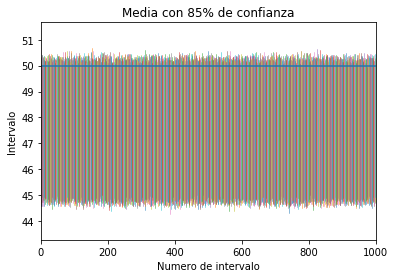

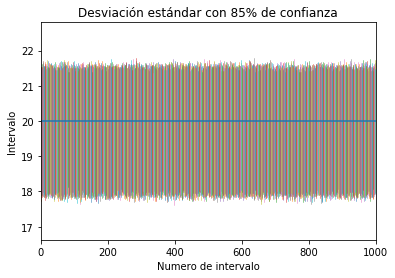

In [22]:
mam = -float("inf")
mim = float("inf")
for i in imed85:
    if i[0] < mim:
        mim = i[0]

    if i[1] > mam:
        mam = i[1]
efe = 0

for i in imed85:
    plt.axis([0, 1000, mim-1, mam+1])
    plt.plot([efe,efe],i,linewidth=0.5)
    efe+=1
plt.plot([0,1000],[50,50], mim-1,mim+1)
plt.title("Media con 85% de confianza")
plt.ylabel("Intervalo")
plt.xlabel("Numero de intervalo")
plt.show()



mam = -float("inf")
mim = float("inf")

for i in ides85:
    if i[0] < mim:
        mim = i[0]

    if i[1] > mam:
        mam = i[1]
efe = 0

for i in ides85:
    plt.axis([0, 1000, mim-1, mam+1])
    plt.plot([efe,efe],i,linewidth=0.5)
    efe+=1
plt.plot([0,1000],[20,20], mim-1,mim+1)
plt.title("Desviación estándar con 85% de confianza")
plt.ylabel("Intervalo")
plt.xlabel("Numero de intervalo")
plt.show()

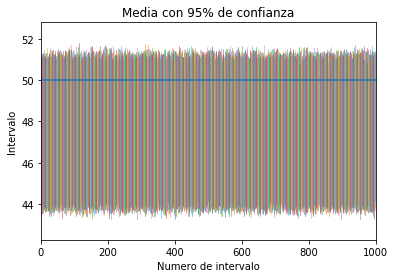

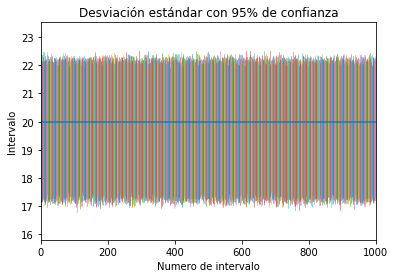

In [23]:
mam = -float("inf")
mim = float("inf")
for i in imed95:
    if i[0] < mim:
        mim = i[0]

    if i[1] > mam:
        mam = i[1]
efe = 0

for i in imed95:
    plt.axis([0, 1000, mim-1, mam+1])
    plt.plot([efe,efe],i,linewidth=0.5)
    efe+=1
plt.plot([0,1000],[50,50], mim-1,mim+1)
plt.title("Media con 95% de confianza")
plt.ylabel("Intervalo")
plt.xlabel("Numero de intervalo")
plt.show()
plt.show()



mam = -float("inf")
mim = float("inf")

for i in ides95:
    if i[0] < mim:
        mim = i[0]

    if i[1] > mam:
        mam = i[1]
efe = 0

for i in ides95:
    plt.axis([0, 1000, mim-1, mam+1])
    plt.plot([efe,efe],i,linewidth=0.5)
    efe+=1
plt.plot([0,1000],[20,20], mim-1,mim+1)
plt.title("Desviación estándar con 95% de confianza")
plt.ylabel("Intervalo")
plt.xlabel("Numero de intervalo")
plt.show()

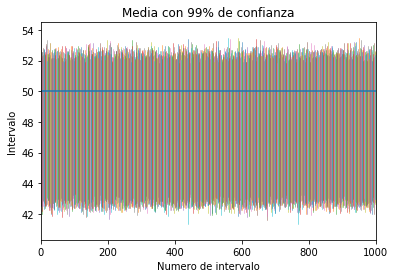

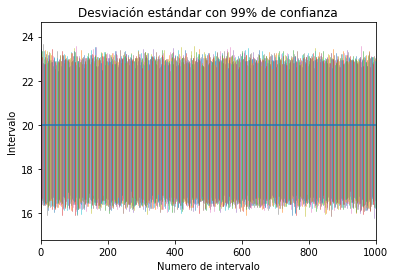

In [24]:
mam = -float("inf")
mim = float("inf")
for i in imed99:
    if i[0] < mim:
        mim = i[0]

    if i[1] > mam:
        mam = i[1]
efe = 0

for i in imed99:
    plt.axis([0, 1000, mim-1, mam+1])
    plt.plot([efe,efe],i,linewidth=0.5)
    efe+=1
plt.plot([0,1000],[50,50], mim-1,mim+1)
plt.title("Media con 99% de confianza")
plt.ylabel("Intervalo")
plt.xlabel("Numero de intervalo")
plt.show()
plt.show()



mam = -float("inf")
mim = float("inf")

for i in ides99:
    if i[0] < mim:
        mim = i[0]

    if i[1] > mam:
        mam = i[1]
efe = 0

for i in ides99:
    plt.axis([0, 1000, mim-1, mam+1])
    plt.plot([efe,efe],i,linewidth=0.5)
    efe+=1
plt.plot([0,1000],[20,20], mim-1,mim+1)
plt.title("Desviación estándar con 99% de confianza")
plt.ylabel("Intervalo")
plt.xlabel("Numero de intervalo")
plt.show()

Si uno observa los gráficos puede notar que  a medida que aumenta la confianza más dentro del intervalo se encuentra el valor original, sin embargo, la precisión del intervalo con 99% es mucho menor, esto se puede observar debido a que el intervalo es mucho más grande en comparación a los demás.
Más en detalle, es observa que en 85%, la media está muy cera del borde, pero el intervalo es más “preciso”
En conclusión se tiene que a mayor precisión, menor confianza y a menor precisión mayor confianza.

## 3. Regresión Lineal (45p)

Uno de los aspectos más importantes de estadística es el análisis de la relación entre dos variables, uno de los modelos más simples para esto es la *Regresión Lineal Simple* donde se estudia una relación lineal entre la variable dependiente e independiente, esto no tiene por qué solamente ser univariado (X e Y) si no que puede ser también multivariado donde se tiene un vector de variables independientes que determinan a una variable de interés.

La regresión lineal simple de mínimos cuadrados es un modelo para representar una relación lineal entre dos variables mediante la ecuación: $Y = a\cdot X + b + \epsilon$. Este será el modelo que se trabajará en esta sección.

Se trabajará con LRData.csv 

>a) Construya un modelo de regresión lineal donde X sea la variable independiente y la columna "Valor" la variable dependiente, luego calcule el MSE (mean standard error) de su modelo 

$$ MSE = \frac{\sum \left(\hat{Y_{i}}- Y_{i}\right)^{2}}{n} $$

$$\hat{Y}: \; prediccion$$

$$Y: \; valor\, verdadero$$

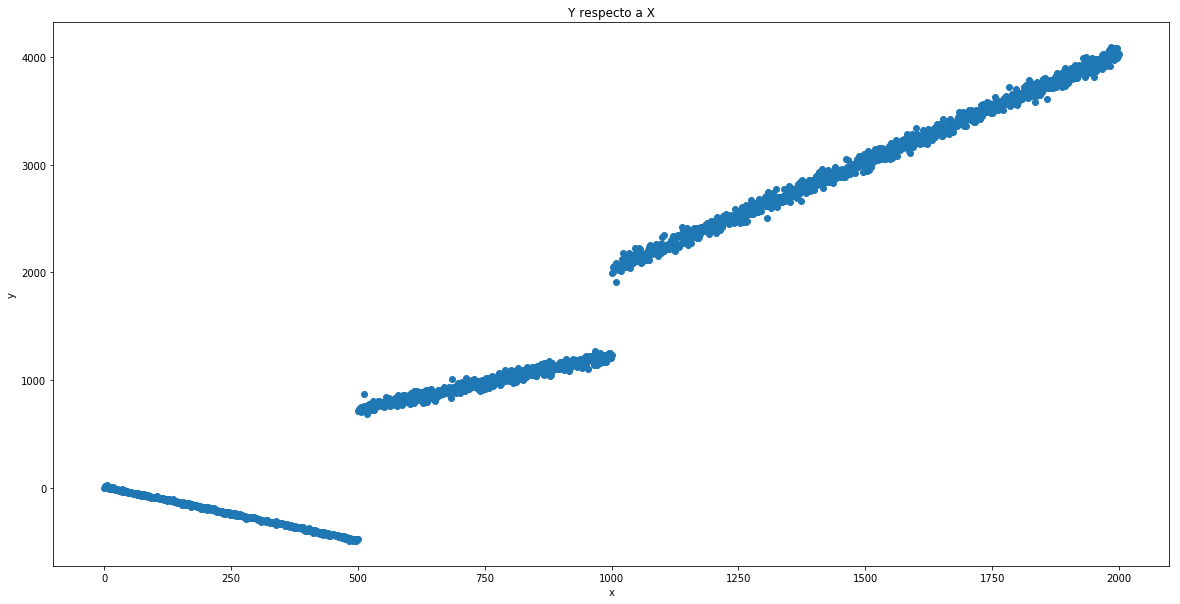

In [4]:

x=[]
y=[]
#Se abre el archivo csv y se almacenan los datos en dos listas
with open('LRData.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i=0
    for row in csv_reader:
        if(i!=0):
            x.append(int(row[0]))
            y.append(float(row[1]))
        i+=1 
#Se cre una gráfica
plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.title('Y respecto a X')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
       

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Se separan los datos en datos de pruba y datos de entrenamiento
x_entrenar,x_prueba,y_entrenar,y_prueba=train_test_split(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1),test_size=0.3)
#Se importa un modelo de regresión lineal
rl=linear_model.LinearRegression()
#Se entrena el modelo
rl.fit(x_entrenar,y_entrenar)
#Se realiza una predicción de los datos
Y_prediccion=rl.predict(x_prueba)
#Se calcula el MSE
print(mean_squared_error(y_prueba, Y_prediccion))

91880.39976033675


El resultado del MSE (Mean Squared Error) obtenido con el modelo es 
91880.39976033675

>b) Construya un scatterplot donde grafique tanto los valores predichos por el modelo como los valores originales de la variable independiente en función de X. Al observar el gráfico ¿cree que sería posible mejorar el MSE obtenido en a)?

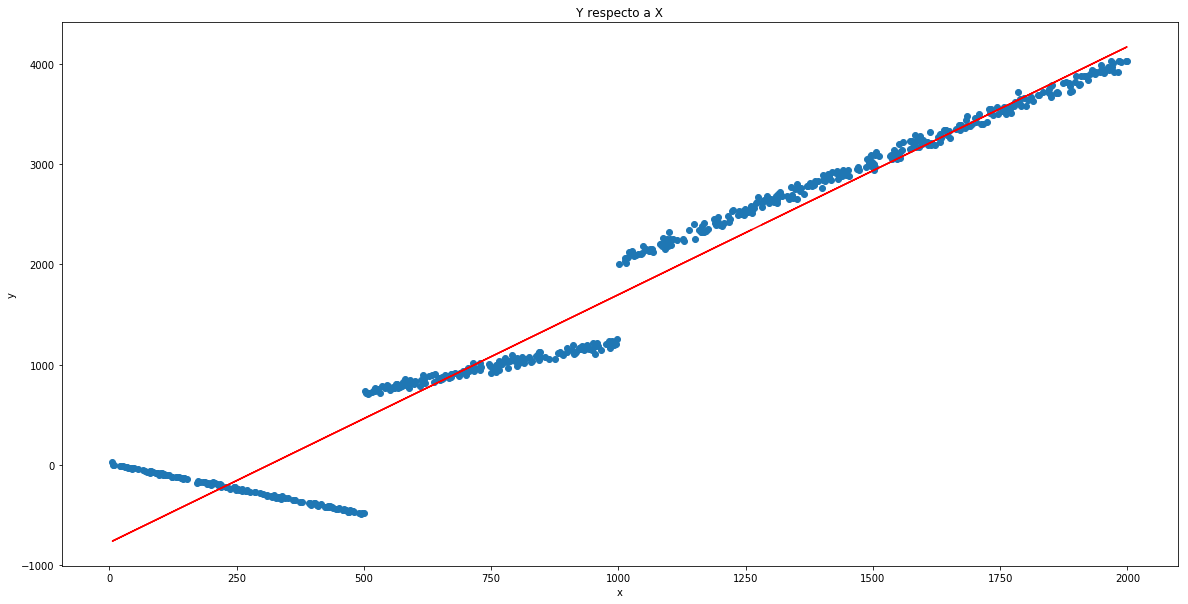

In [6]:
#Se crea la gráfica de las predicciones y las realidad
plt.figure(figsize=(20,10))
plt.scatter(x_prueba,y_prueba)
plt.plot(x_prueba,Y_prediccion,color='red')
plt.title('Y respecto a X')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Es posible mejorarlo, ya que el gráfico se puede subdividir en tres sectores distintos: de 0 a 500, de 500 a 1000, de 1000 a 2000. De ésta forma, queda una función discontinua dividida en tres partes. Si realizamos una regresión lineal a esos tres sectores por separado, se puede reducir el MSE.


>c) Si en b) respondió que no, saltese esta pregunta, caso contrario, implemente su solución, verifique el MSE disminuye y vuelva a graficar los valores.

54.669254074954196
951.7648582442467
1529.0785423516731


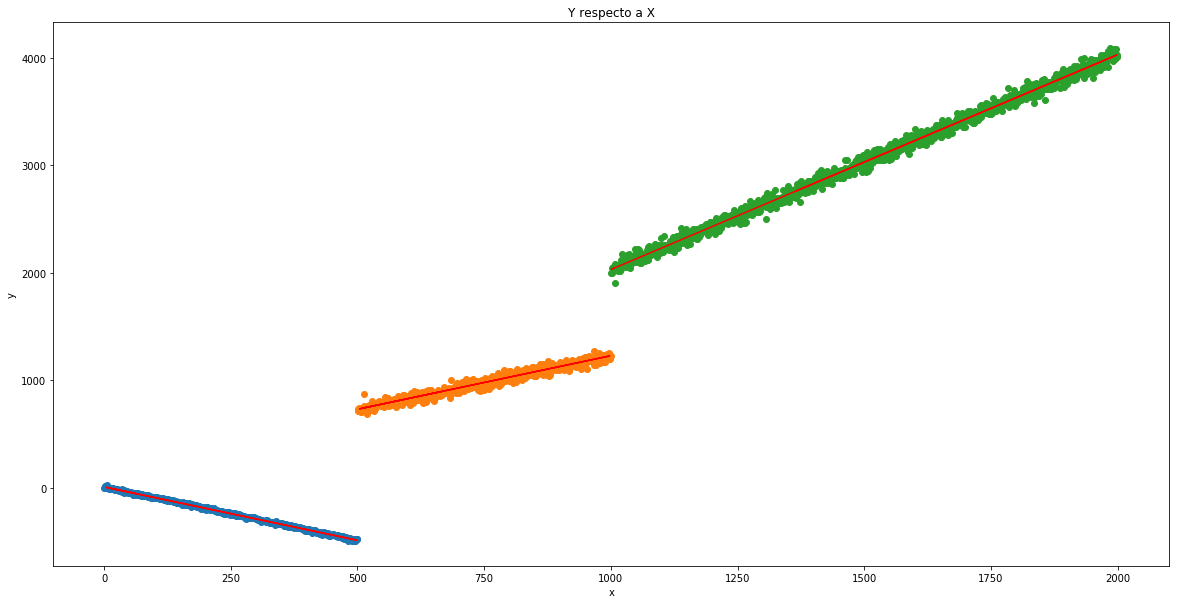

In [7]:
i=0
x1=[]
x2=[]
x3=[]
y1=[]
y2=[]
y3=[]
#Se separan los datos en tres segmentos distintos
while(i<2000):
    if(i<=500):
        x1.append(x[i])
        y1.append(y[i])
    if(500<i<=1000):
        x2.append(x[i])
        y2.append(y[i])
    if(1000<i):
        x3.append(x[i])
        y3.append(y[i])
    i+=1

#Se separan los datos en datos de pruba y datos de entrenamiento
x1_entrenar,x1_prueba,y1_entrenar,y1_prueba=train_test_split(np.array(x1).reshape(-1,1),np.array(y1).reshape(-1,1),test_size=0.3)
#Se importa un modelo de regresión lineal
rl1=linear_model.LinearRegression()
#Se entrena el modelo
rl1.fit(x1_entrenar,y1_entrenar)
#Se realiza una predicción de los datos
Y1_prediccion=rl1.predict(x1_prueba)
#Se calcula el MSE
print(mean_squared_error(y1_prueba, Y1_prediccion))

#Se separan los datos en datos de pruba y datos de entrenamiento
x2_entrenar,x2_prueba,y2_entrenar,y2_prueba=train_test_split(np.array(x2).reshape(-1,1),np.array(y2).reshape(-1,1),test_size=0.3)
#Se importa un modelo de regresión lineal
rl2=linear_model.LinearRegression()
#Se entrena el modelo
rl2.fit(x2_entrenar,y2_entrenar)
#Se realiza una predicción de los datos
Y2_prediccion=rl2.predict(x2_prueba)
#Se calcula el MSE
print(mean_squared_error(y2_prueba, Y2_prediccion))

#Se separan los datos en datos de pruba y datos de entrenamiento
x3_entrenar,x3_prueba,y3_entrenar,y3_prueba=train_test_split(np.array(x3).reshape(-1,1),np.array(y3).reshape(-1,1),test_size=0.3)
#Se importa un modelo de regresión lineal
rl3=linear_model.LinearRegression()
#Se entrena el modelo
rl3.fit(x3_entrenar,y3_entrenar)
#Se realiza una predicción de los datos
Y3_prediccion=rl3.predict(x3_prueba)
#Se calcula el MSE
print(mean_squared_error(y3_prueba, Y3_prediccion))

#Se muestra la regresión lineal y los MSE.

plt.figure(figsize=(20,10))    
plt.title('Y respecto a X')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.plot(x3_prueba,Y3_prediccion,color='red')
plt.plot(x2_prueba,Y2_prediccion,color='red')
plt.plot(x1_prueba,Y1_prediccion,color='red')
plt.show()






De esta forma, se tienen tres MSE distintos para cada segmento de la recta dependiendo de que intervalo sea el valor.

El MSE dados para un número entre 0 y 500 es:54.669254074954196

El MSE dados para un número entre 500 y 1000 es:951.7648582442467

El MSE dados para un número ente 1000 y 2000 es:1529.0785423516731

Esto reduce considerablemente el MSE obtenido con anterioridad. Por otro lado, la gráfica muestra una mejora sustancial en la predicción de datos, emulando su comportamiento casi perfectamente( líneas rojas)

>d) Utilizando su solución propuesta en c) calcule un intervalo de confianza con un nivel de 90%, 95% y 99% de confiabilidad cuando X = 749

In [8]:
import statistics as stats

yreal=y[749]

#Obtener los datos par la creación de los intervalos de confianza utilizando T-Student.
desviacion=stats.pstdev(y2)
gradosdelibertad=len(y2)-1
raizn=(len(y2))**0.5
valor=rl2.predict(np.array(749).reshape(-1,1))
num99=2.3263
num95=1.6449
num90=1.2816
#Calcular los intervalos.
print([yreal-(num99*(desviacion/raizn)),yreal+(num99*(desviacion/raizn))])
print([yreal-(num95*(desviacion/raizn)),yreal+(num95*(desviacion/raizn))])
print([yreal-(num90*(desviacion/raizn)),yreal+(num90*(desviacion/raizn))])




[903.6778079663392, 934.3677017827121]
[908.1725192345497, 929.8729905145016]
[910.5689509981847, 927.4765587508665]


Utilizando la respuesta en c, se puedieron crear los tres intervalos de confianza utilizando el método T-Student:

99% = [903.6778079663392, 934.3677017827121]

95% = [908.1725192345497, 929.8729905145016]

90% = [910.5689509981847, 927.4765587508665]

El valor real de 749 es: 919.0227548745256

>e) Comente como se debería implementar la solución dada en c) utilizando el método bootstrap y luego proceda a implementarla, compare ambos modelos resultantes y comente respecto al desempeño de éstos. Puede mencionar otros aspectos también (complejidad, implementación, etc).

In [9]:


supermuestra=[]
i=0
i2=0
while(i<100):
    while(i2<len(y2)):
        supermuestra.append(random.choice(y2))
        i2+=1
    i+=1
    
valores=[]
for i in supermuestra:
    x_entrenar,x_prueba,y_entrenar,y_prueba=train_test_split(np.array(x2).reshape(-1,1),np.array(supermuestra).reshape(-1,1),test_size=0.3)
    #Se importa un modelo de regresión lineal
    rl=linear_model.LinearRegression()
    #Se entrena el modelo
    rl.fit(x_entrenar,y_entrenar)
    #Se realiza una predicción de los datos
    Y_prediccion=rl.predict(np.array(749).reshape(-1,1))
    valores.append(Y_prediccion)
    
    

jaja=[]
for elemento in valores:
    jaja.append(yreal-elemento)
jaja.sort()

print([yreal+jaja[90][0][0],yreal-jaja[10][0][0]])
print([yreal+jaja[95][0][0],yreal-jaja[5][0][0]])
print([yreal+jaja[99][0][0],yreal-jaja[1][0][0]])

print(jaja[10])

    

[840.6563640056221, 1003.3628335663094]
[840.736135460017, 1003.9818724062727]
[840.8196456879909, 1005.4842433816789]
[[-84.34007869]]


Utilizando bootstrap para calcular el intervalo obtenido en d, se obtienen los siguientes datos:

90%=[861.2316458392819, 981.1912331381491]

95%=[861.3510608422398, 981.6471971572092]

99%=[861.5214088216313, 982.1552619191648]

Si bien el dato real está en ese intervalo, la cantidad de valores que abarca con respecto al resultado en d) es mucho mayor, rsto se debe a que bootstrap hace el mismo trabajo con mucha menos información. Por otro lado, su implementación con respecto al método d) es igual de simple, sin embargo, dependiendo de cuanta precisión queramos que tenga nuestra estimación bootstrap, el tiempo de ejecución puede resultar mucho peor con respecto a la solución en d (que es la genérica). Para concluir, bootstrap es un excelente método para estimar valores cuando no se tiene mucha información respecto a tu muestra, pero para muestras que señalen un comportamiento muy claro, es mejor utilizar el método tradicional para calcular intervalos de confianza.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 25 de julio.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Meme 

Si se dividen el trabajo del lab, que no quede así:

<img src="img/trabajo.png">

